# Informações individuais retiradas do RI de cada empresa

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("infos.json")
display(df.head())

,Empresa,Setor,Faturamento 2024 (R$ mil),Lucro Líquido 2024 (R$ mil),Carteira de Crédito Bruta 2024 (R$ mil),PDD - Balanço 2024 (R$ mil),PDD - DRE 2024 (R$ mil)
0,Banco ABC Brasil,Bancário / Serviços Financeiros,NaN,971300.0,53200000.0,NaN,NaN
1,Aeris Indústria e Comércio de Equipamentos par...,Energia Eólica / Equipamentos Industriais,1516500.0,-934100.0,NaN,NaN,NaN
2,Brava Energia (antiga 3R Petroleum),Petróleo e Gás,10095900.0,NaN,NaN,NaN,NaN
3,Três Tentos Agroindustrial S.A.,Agroindustrial,NaN,756400.0,NaN,NaN,21346.0
4,Alphaville S.A.,Incorporação Imobiliária,678829.0,66144.0,NaN,6766.0,4546.0


In [3]:
# Converter colunas numéricas (tratando None como NaN)
df = df.apply(pd.to_numeric, errors='ignore')


# Somatórios gerais
soma_balanco = df["PDD - Balanço 2024 (R$ mil)"].sum(skipna=True)
soma_dre = df["PDD - DRE 2024 (R$ mil)"].sum(skipna=True)


print("Soma total PDD - Balanço 2024:", soma_balanco)
print("Soma total PDD - DRE 2024:", soma_dre)


# Agrupar por setor (somando faturamento, lucro e PDDs)
setor_grouped = df.groupby("Setor").agg({
"Faturamento 2024 (R$ mil)": "sum",
"Lucro Líquido 2024 (R$ mil)": "sum",
"PDD - Balanço 2024 (R$ mil)": "sum",
"PDD - DRE 2024 (R$ mil)": "sum"
}).reset_index()


#print("\nResumo por setor:")
#print(setor_grouped)

Soma total PDD - Balanço 2024: 307143302.0
Soma total PDD - DRE 2024: 160318400.0


C:\Users\Matheus Almeida\AppData\Local\Temp\ipykernel_6928\776902091.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


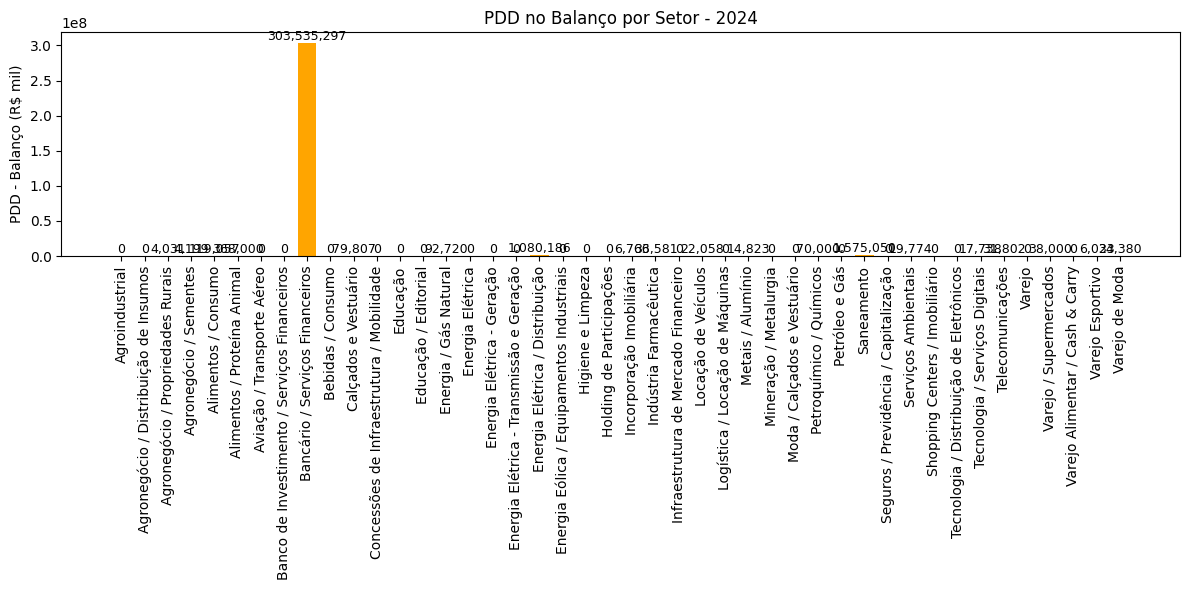

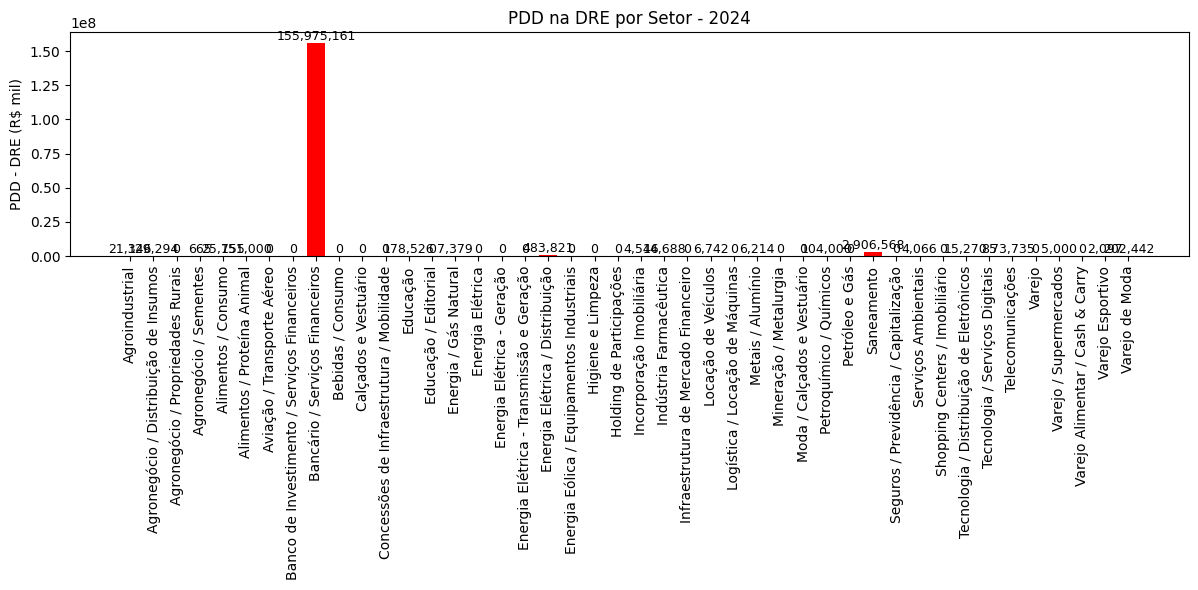

In [4]:
# Gráficos

# plt.figure(figsize=(12,6))
# plt.bar(setor_grouped["Setor"], setor_grouped["Faturamento 2024 (R$ mil)"], color="skyblue")
# plt.xticks(rotation=90)
# plt.ylabel("Faturamento (R$ mil)")
# plt.title("Faturamento por Setor - 2024")
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(12,6))
# plt.bar(setor_grouped["Setor"], setor_grouped["Lucro Líquido 2024 (R$ mil)"], color="green")
# plt.xticks(rotation=90)
# plt.ylabel("Lucro Líquido (R$ mil)")
# plt.title("Lucro Líquido por Setor - 2024")
# plt.tight_layout()
# plt.show()


# Gráfico PDD - Balanço
plt.figure(figsize=(12,6))
bars = plt.bar(setor_grouped["Setor"], setor_grouped["PDD - Balanço 2024 (R$ mil)"], color="orange")

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura, f"{altura:,.0f}", 
             ha="center", va="bottom", fontsize=9)

plt.xticks(rotation=90)
plt.ylabel("PDD - Balanço (R$ mil)")
plt.title("PDD no Balanço por Setor - 2024")
plt.tight_layout()
plt.show()


# Gráfico PDD - DRE
plt.figure(figsize=(12,6))
bars = plt.bar(setor_grouped["Setor"], setor_grouped["PDD - DRE 2024 (R$ mil)"], color="red")

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura, f"{altura:,.0f}", 
             ha="center", va="bottom", fontsize=9)

plt.xticks(rotation=90)
plt.ylabel("PDD - DRE (R$ mil)")
plt.title("PDD na DRE por Setor - 2024")
plt.tight_layout()
plt.show()


